In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
sns.set(style="white", context='poster')
from sympy import *
import math
init_printing(use_unicode=True)
from scipy.integrate import solve_ivp

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
from model_equations_separate_NC_sep_vmax import *

In [4]:

HCOLOR = '#ffc58f'
HCOLOR_light = '#ffd2a9'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

SHCOLOR = '#ffa98f'
SPCOLOR = '#326232'


ccnpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR,DONCOLOR, RDONCOLOR, DINCOLOR]
ccnorder = ['Bp', 'Bh', 'Sp', 'Sh', 'DON', 'RDON', 'DIN', ]
cccpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
cccorder = ['Bp[C]', 'Bh[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'Sp', 'Sh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'Sp', 'Sh', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


In [5]:
refdf = pd.read_csv('prelim_bottle.csv')


In [6]:
print_params()

M_h  = 1.16e-06, 1.00e-01
M_p  = 1.16e-06, 1.00e-01
gamma^D_p  = 6.00e-01, 5.18e+04
gamma^D_h  = 6.00e-01, 5.18e+04
R_p  = 7.00e+00, 6.05e+05
R_h  = 4.50e+00, 3.89e+05
E^O_p  = 1.16e-06, 1.00e-01
E^I_p  = 0.00e+00, 0.00e+00
E^O_h  = 0.00e+00, 0.00e+00
E^I_h  = 1.16e-06, 1.00e-01
K^ON_p  = 1.43e-01, 1.23e+04
K^IN_p  = 1.43e-01, 1.23e+04
K^OC_p  = 1.43e-01, 1.23e+04
K^IC_p  = 1.43e-01, 1.23e+04
K^ON_h  = 2.50e-01, 2.16e+04
K^IN_h  = 2.50e-01, 2.16e+04
K^OC_h  = 2.50e-01, 2.16e+04
K^IC_h  = 2.50e-01, 2.16e+04
Vmax^ON_p  = 8.62e-10, 7.45e-05
Vmax^IN_p  = 8.62e-06, 7.45e-01
Vmax^OC_p  = 6.03e-09, 5.21e-04
Vmax^IC_p  = 6.03e-05, 5.21e+00
Vmax^ON_h  = 1.54e-05, 1.33e+00
Vmax^IN_h  = 1.54e-05, 1.33e+00
Vmax^OC_h  = 6.93e-05, 5.99e+00
Vmax^IC_h  = 6.93e-09, 5.98e-04
O_p  = 6.00e-01, 5.18e+04
O_h  = 6.00e-01, 5.18e+04
epsilon  = 6.48e-07, 5.60e-02
VTmax  = 7.70e-06, 6.65e-01
KT_h  = 2.50e-01, 2.16e+04
omega  = 1.00e-02, 8.64e+02
K^S_p  = 1.43e+01, 1.23e+06
K^S_h  = 1.43e+01, 1.23e+06
E^S_p  = 6.

In [7]:
pro_vol, alt_vol, pro_vol**0.67, alt_vol**0.67, Qp, Qh

In [8]:
var_names, init_vars, calc_dydt, interm_names, intermediate_func = get_honly_data()

In [9]:
print_dydt0(calc_dydt, var_names, init_vars)


dBh/dt = 3.09e-04, init Bh = 2.86e+01, newval = 2.86e+01
dDON/dt = -3.28e-04, init DON = 2.00e+01, newval = 2.00e+01
dRDON/dt = 1.32e-05, init RDON = 0.00e+00, newval = 1.32e-05
dDIN/dt = 5.95e-06, init DIN = 1.00e+02, newval = 1.00e+02
dDOC/dt = -1.89e-03, init DOC = 1.32e+02, newval = 1.32e+02
dRDOC/dt = 5.95e-05, init RDOC = 0.00e+00, newval = 5.95e-05
dDIC/dt = 4.36e-04, init DIC = 3.00e+03, newval = 3.00e+03
dROS/dt = -0.00e+00, init ROS = 0.00e+00, newval = 0.00e+00
dSp/dt = 0.00e+00, init Sp = 0.00e+00, newval = 0.00e+00
dSh/dt = 1.16e-15, init Sh = 0.00e+00, newval = 1.16e-15


In [10]:
print_intermediate0(intermediate_func, interm_names, init_vars)


Xh   = 1.00e+10
limINh = 9.98e-01
limONh = 9.88e-01
limICh = 1.00e+00
limOCh = 9.98e-01
gross_uptakeINh = 4.39e-04
gross_uptakeONh = 4.34e-04
gross_uptakeICh = 1.98e-07
gross_uptakeOCh = 1.98e-03
actual_uptakeNh = 4.39e-04
overflowNh = 4.34e-04
overflowCh = 1.30e-18
deathh = 3.31e-05
exudationOh = 0.00e+00
exudationIh = 3.31e-05
Tbreakdownh = 0.00e+00
respirationh = 6.39e-05
dic_uptake = -1.04e-16


In [11]:
biomass_diff0_honly(calc_dydt, var_names,init_vars)


dBh/dt + dDON/dt + dRDON/dt + dDIN/dt = -1.1573366912173352e-15


In [12]:
init_vars

In [13]:
var_names

['Bh', 'DON', 'RDON', 'DIN', 'DOC', 'RDOC', 'DIC', 'ROS', 'Sp', 'Sh']

In [14]:
sol = run_solver(calc_dydt, init_vars, days=140, t_eval=get_t_eval(maxday=140, step = 3600*4, ref_times = refdf['t']))
#sol = run_solver(calc_dydt, init_vars)

simulation time 35.21875


In [15]:
df, mdf = solver2df(sol, var_names, interm_names, intermediate_func)

In [16]:
df.head()

,Bh,DON,RDON,DIN,DOC,RDOC,DIC,ROS,Sp,Sh,...,overflowCh,deathh,exudationOh,exudationIh,Tbreakdownh,respirationh,dic_uptake,Bh[C],Sp[C],Sh[C]
0,28.571429,20.000000,0.000000,100.000000,132.500000,0.000000,3000.000000,0.0,0.0,0.000000e+00,...,1.301043e-18,0.000033,0.0,0.000033,0.0,0.000064,-1.040834e-16,128.571429,0.0,0.000000e+00
1,33.384099,14.896224,0.206104,100.085002,103.118553,0.927470,3005.960878,0.0,0.0,1.803413e-11,...,1.734723e-18,0.000039,0.0,0.000039,0.0,0.000075,-1.142502e-04,150.228444,0.0,8.115360e-11
2,39.000561,8.972297,0.446907,100.151664,68.819914,2.011080,3011.487304,0.0,0.0,3.910434e-11,...,1.301043e-18,0.000045,0.0,0.000045,0.0,0.000087,-2.201733e-04,175.502523,0.0,1.759695e-10
3,45.537660,2.242351,0.728162,100.063256,28.863401,3.276728,3016.849700,0.0,0.0,6.371416e-11,...,2.168404e-18,0.000053,0.0,0.000053,0.0,0.000102,-3.229526e-04,204.919471,0.0,2.867137e-10
4,49.292931,0.019744,1.051698,98.207056,0.011824,4.732640,3021.964983,0.0,0.0,9.202356e-11,...,5.421011e-20,0.000057,0.0,0.000057,0.0,0.000103,-4.209955e-04,221.818189,0.0,4.141060e-10


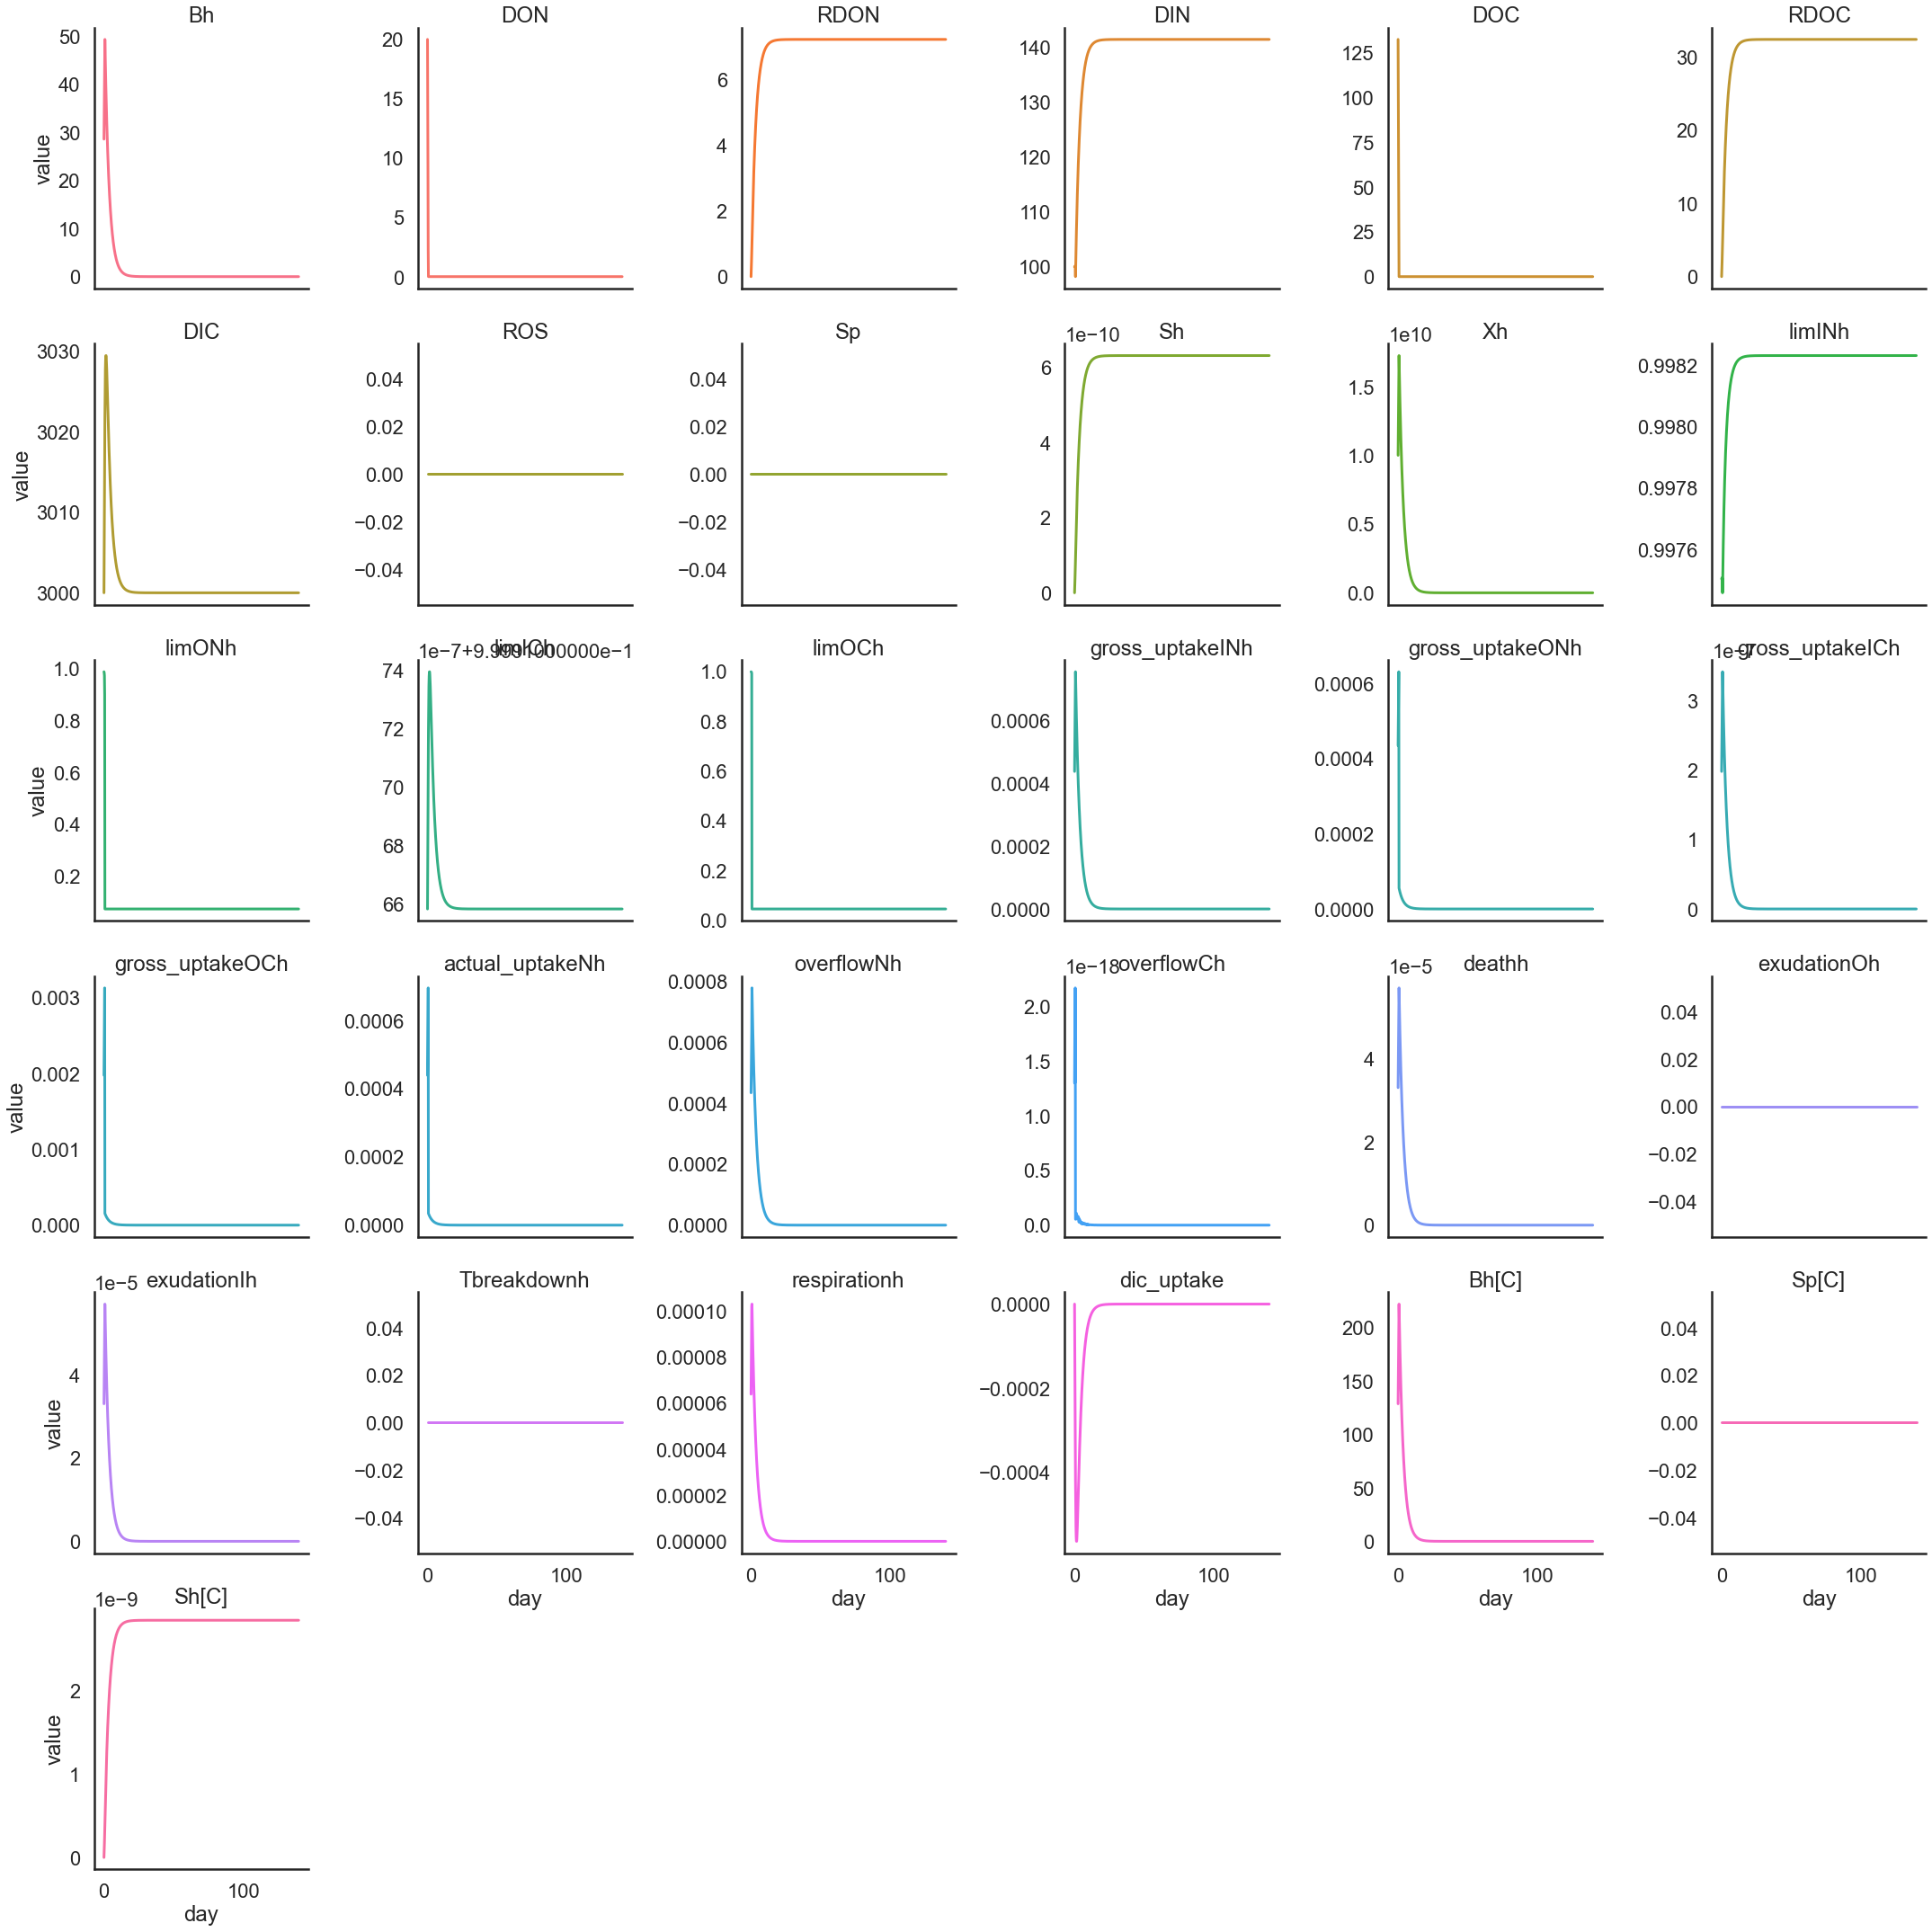

In [17]:
sns.relplot(data=mdf, x='day', y='value', hue='variable',
            kind='line', 
            col='variable', col_wrap=6, facet_kws=dict(sharey=False),
            legend=False,
           ).set_titles(row_template = '{row_name}', col_template = '{col_name}')

In [18]:
refdf.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'day', '1A3', 'cc 1A3', 'cc mit9312',
       'mit9312', 'cc Bh[N]', 'Bh[N]', 'cc Bp[N]', 'Bp[N]', 'cc Bh[C]',
       'Bh[C]', 'cc Bp[C]', 'Bp[C]', 't'],
      dtype='object')

<AxesSubplot:xlabel='day', ylabel='cells/l'>

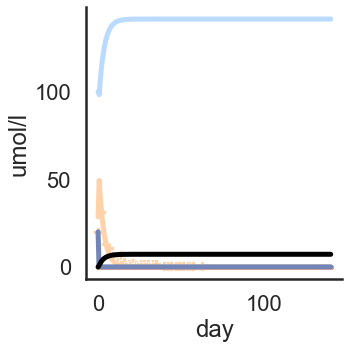

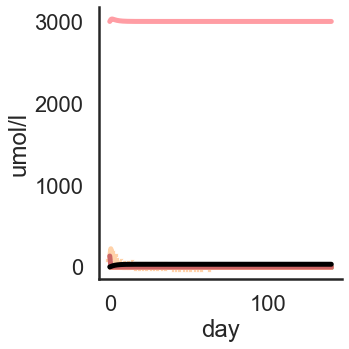

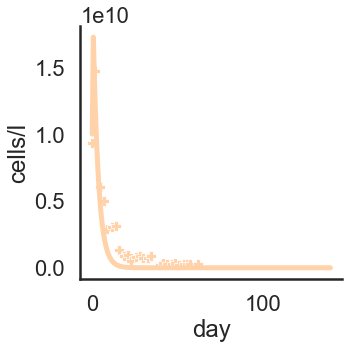

In [19]:
g = sns.relplot(data=mdf.loc[mdf.variable.isin(hnorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5 , legend=False,
            palette=hnpalette, hue_order=hnorder,
           ).set(ylabel='umol/l')
sns.scatterplot(data=refdf, x='day', y='Bh[N]', ax=g.ax, s=100, legend=False, color=HCOLOR_light, marker='P')

g = sns.relplot(data=mdf.loc[mdf.variable.isin(hcorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=hcpalette, hue_order=hcorder,
           ).set(ylabel='umol/l')
sns.scatterplot(data=refdf, x='day', y='Bh[C]', ax=g.ax, s=100, legend=False, color=HCOLOR_light, marker='P')

g = sns.relplot(data=mdf.loc[mdf.variable.isin(['Xh'])], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=[HCOLOR_light], 
           ).set(ylabel='cells/l')
#sns.scatterplot(data=refdf, x='day', y='cc mit9312', ax=g.ax, s=100, legend=False, color=PCOLOR)
sns.scatterplot(data=refdf, x='day', y='1A3', ax=g.ax, s=100, legend=False, color=HCOLOR_light, marker='P')


<AxesSubplot:xlabel='day', ylabel='cells/l'>

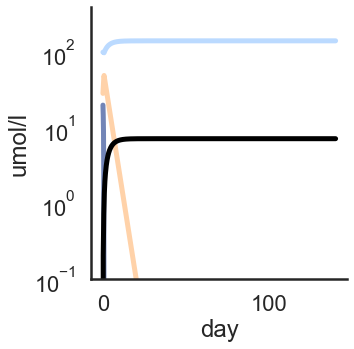

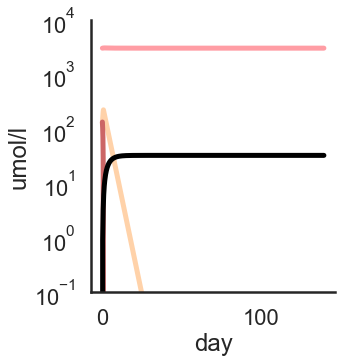

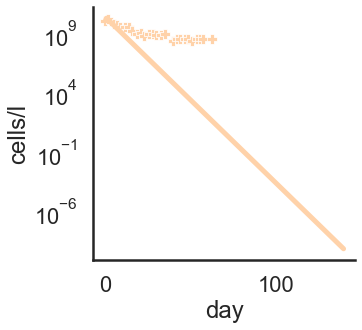

In [20]:
sns.relplot(data=mdf.loc[mdf.variable.isin(hnorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5,
            palette=hnpalette, hue_order=hnorder, legend=False,
           ).set(ylabel='umol/l', yscale='log', ylim=(1e-1,4e2))

sns.relplot(data=mdf.loc[mdf.variable.isin(hcorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5,
            palette=hcpalette, hue_order=hcorder, legend=False,
           ).set(ylabel='umol/l', yscale='log', ylim=(1e-1,1e4))

g = sns.relplot(data=mdf.loc[mdf.variable.isin(['Xh'])], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=[HCOLOR_light], 
           ).set(ylabel='cells/l', yscale='log')
#sns.scatterplot(data=refdf, x='day', y='cc mit9312', ax=g.ax, s=100, legend=False, color=PCOLOR)
sns.scatterplot(data=refdf, x='day', y='1A3', ax=g.ax, s=100, legend=False,color=HCOLOR_light, marker='P')


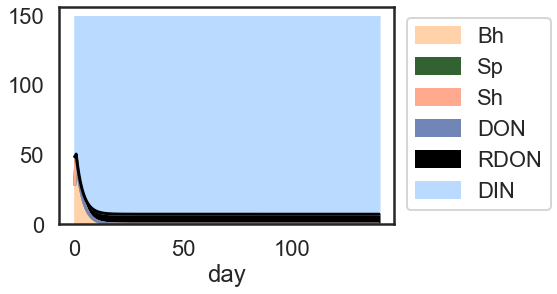

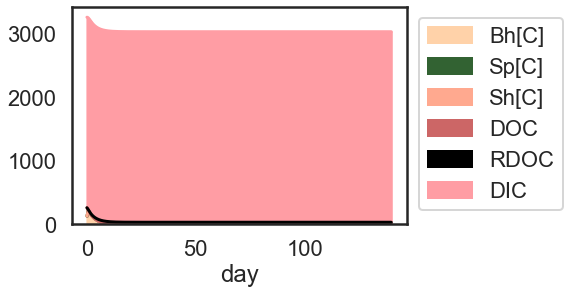

In [21]:
from matplotlib.colors import LinearSegmentedColormap
df[hnorder+ ['day']].plot.area(x='day', 
                                colormap=LinearSegmentedColormap.from_list("", hnpalette) 
                               )
plt.legend(loc='upper right', bbox_to_anchor =(1.5,1))
plt.show()
df[hcorder+ ['day']].plot.area(x='day', 
                                colormap=LinearSegmentedColormap.from_list("", hcpalette) 
                               )
plt.legend(loc='upper right', bbox_to_anchor =(1.5,1))
plt.show()

In [22]:
len(param_vals)

In [23]:
df.min()

Bh                 2.116778e-18
DON                1.974381e-02
RDON               0.000000e+00
DIN                9.820706e+01
DOC                1.182389e-02
RDOC               0.000000e+00
DIC                3.000000e+03
ROS                0.000000e+00
Sp                 0.000000e+00
Sh                 0.000000e+00
t                  0.000000e+00
day                0.000000e+00
Xh                 7.408721e-10
limINh             9.974581e-01
limONh             7.312084e-02
limICh             9.999166e-01
limOCh             4.511278e-02
gross_uptakeINh    3.252706e-23
gross_uptakeONh    2.382932e-24
gross_uptakeICh    1.466187e-26
gross_uptakeOCh    6.614930e-24
actual_uptakeNh    1.473243e-24
overflowNh         3.343675e-23
overflowCh         4.408104e-39
deathh             2.449974e-24
exudationOh        0.000000e+00
exudationIh        2.449974e-24
Tbreakdownh        0.000000e+00
respirationh       4.424686e-24
dic_uptake        -5.648784e-04
Bh[C]              9.525499e-18
Sp[C]   

In [24]:
dir(sol)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'count',
 'index']